## Meteor Data - Link: https://catalog.data.gov/dataset/meteorite-landings

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",None)
sns.set_style("whitegrid")

In [26]:
df = pd.read_csv("Meteorite_Landings.csv")
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [27]:
nrows,ncols = df.shape 
print(f"# of rows: {nrows}\n# of columns: {ncols}")

# of rows: 45716
# of columns: 10


In [28]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [29]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [30]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [31]:
df['nametype'].value_counts()

nametype
Valid     45641
Relict       75
Name: count, dtype: int64

In [32]:
recclass_vals = pd.DataFrame(df['recclass'].value_counts().sort_values(ascending=False))

In [33]:
top_10_classes = recclass_vals[:10]
top_10_classes

,count
recclass,
L6,8285
H5,7142
L5,4796
H6,4528
H4,4211
LL5,2766
LL6,2043
L4,1253
H4/5,428


Text(0, 0.5, 'count')

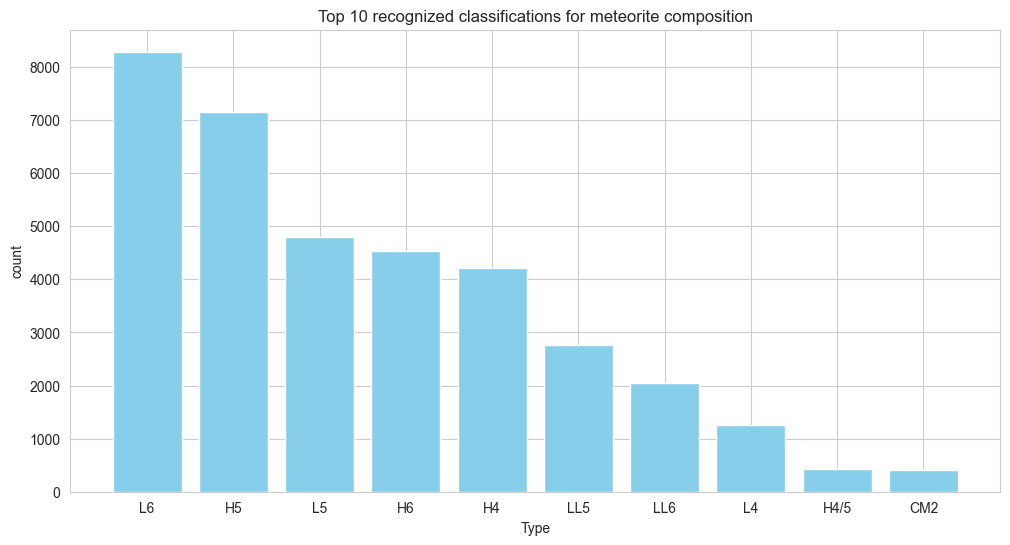

In [34]:
plt.figure(figsize=(12,6))

plt.bar(top_10_classes.index,top_10_classes['count'],color='skyblue')
plt.title("Top 10 recognized classifications for meteorite composition")
plt.xlabel("Type")
plt.ylabel("count")